In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#df_berlin_cleaned with C engine (the default) is causing issues, that why using the Python engine:
df = pd.read_csv('berlin_cleaned.csv')
df.head()

,Unnamed: 0,serviceCharge,heatingType,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,scoutId,hasKitchen,...,lift,typeOfFlat,noRooms,floorNo,numberOfFloors,garden,regio3,heatingCosts,ParkSpaces,fullAddress
0,0,320.00,central_heating,False,True,32.135642,1140.00,1980.0,115671495,True,...,True,ground_floor,3.0,0.0,3.0,False,Staaken_Spandau,105.379839,1,"Metropolitan Park 63, 13591 Berlin, Germany"
1,1,79.00,central_heating,False,False,40.000000,955.00,1918.0,113359456,False,...,False,ground_floor,2.0,0.0,3.0,False,Weißensee_Weißensee,68.000000,0,"Börnestraße 11, 13086 Berlin, Germany"
2,2,150.00,floor_heating,True,True,40.000000,1300.00,2019.0,113704695,True,...,True,apartment,2.0,3.0,5.0,False,Mitte_Mitte,70.253226,1,"Stallschreiberstraße 27, 10179 Berlin, Germany"
3,3,228.78,floor_heating,False,True,32.135642,1428.78,2017.0,107589685,True,...,True,apartment,2.5,6.0,7.0,False,Kreuzberg_Kreuzberg,87.816533,0,"Hallesche Straße 5a, 10963 Berlin, Germany"
4,4,147.08,district_heating,True,True,40.000000,1559.05,2019.0,114773727,True,...,True,ground_floor,2.0,0.0,6.0,False,Tiergarten_Tiergarten,73.540000,0,"Heidestraße 19, 10557 Berlin, Germany"


In [62]:
df = df.drop(columns='Unnamed: 0')
df.shape

(8879, 24)

In [63]:
df.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'hasKitchen', 'cellar', 'baseRent', 'livingSpace', 'condition',
       'petsAllowed', 'lift', 'typeOfFlat', 'noRooms', 'floorNo',
       'numberOfFloors', 'garden', 'regio3', 'heatingCosts', 'ParkSpaces',
       'fullAddress'],
      dtype='object')

# LivingSpace vs. Total Rent and Base Rent:

The below scatter plots show the **linear relationship** between the features livingSpace and totalRent, as well as livingSpace and baseRent.

Overall we can see the total rent and the base rent of the properties inscrease with the inscrease of living space in sqm.

There are few outliners e.g. 33sqm for 50,000 total rent. We can assume it due to a typo.

Text(0.5, 1.0, 'LivingSpace vs. Base Rent')

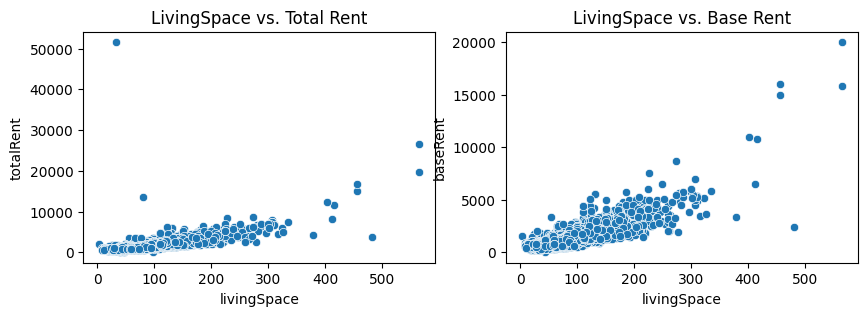

In [64]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='livingSpace', y='totalRent')
plt.title('LivingSpace vs. Total Rent')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='livingSpace', y='baseRent')
plt.title('LivingSpace vs. Base Rent')

In [71]:
#chheck on outliner with total rent > 50k
high_rent_row = df[df['totalRent'] > 40000]
high_rent_row[['livingSpace','serviceCharge', 'totalRent', 'baseRent', 'heatingCosts']]

,livingSpace,serviceCharge,totalRent,baseRent,heatingCosts
3058,32.9,50.0,51570.0,427.7,38.0


# Relationship Exploration:

The below scatter plot is use to explore relationships between features. 

Next to the above described relation between livingSpace and totalRate, we have also information on if the property has balcony or not, which is highlighted with colors. 

The size of the data points provides information on the number of rooms.

<Axes: xlabel='livingSpace', ylabel='totalRent'>

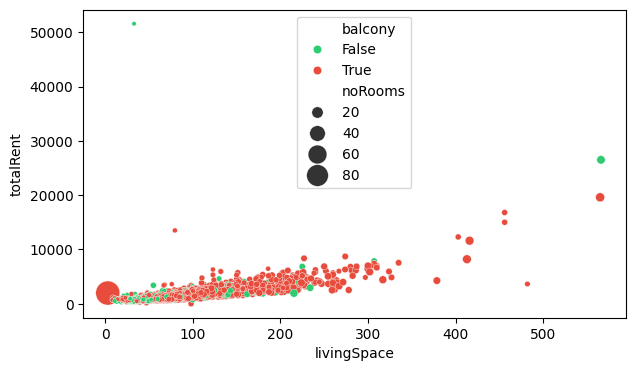

In [66]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x="livingSpace", y="totalRent", hue='balcony', size="noRooms",
                palette=sns.color_palette(["#2ecc71", "#e74c3c"]),
                sizes=(10, 300))

# Correlation Analysis:

The below heatmap shows the correlation between all 12 nummerial features of the cleaned dataset.

The takeaway is that there is a strong correlation between: linvingSpace, totalREnt, baseRent, heatingCosts and serviceCharge.

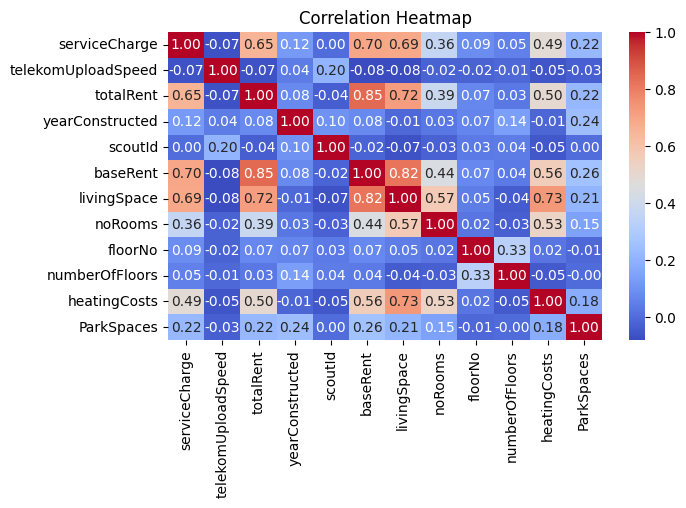

In [69]:
df_num = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(7,4))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distributions and Outliers:

The below histograms of numerial features...

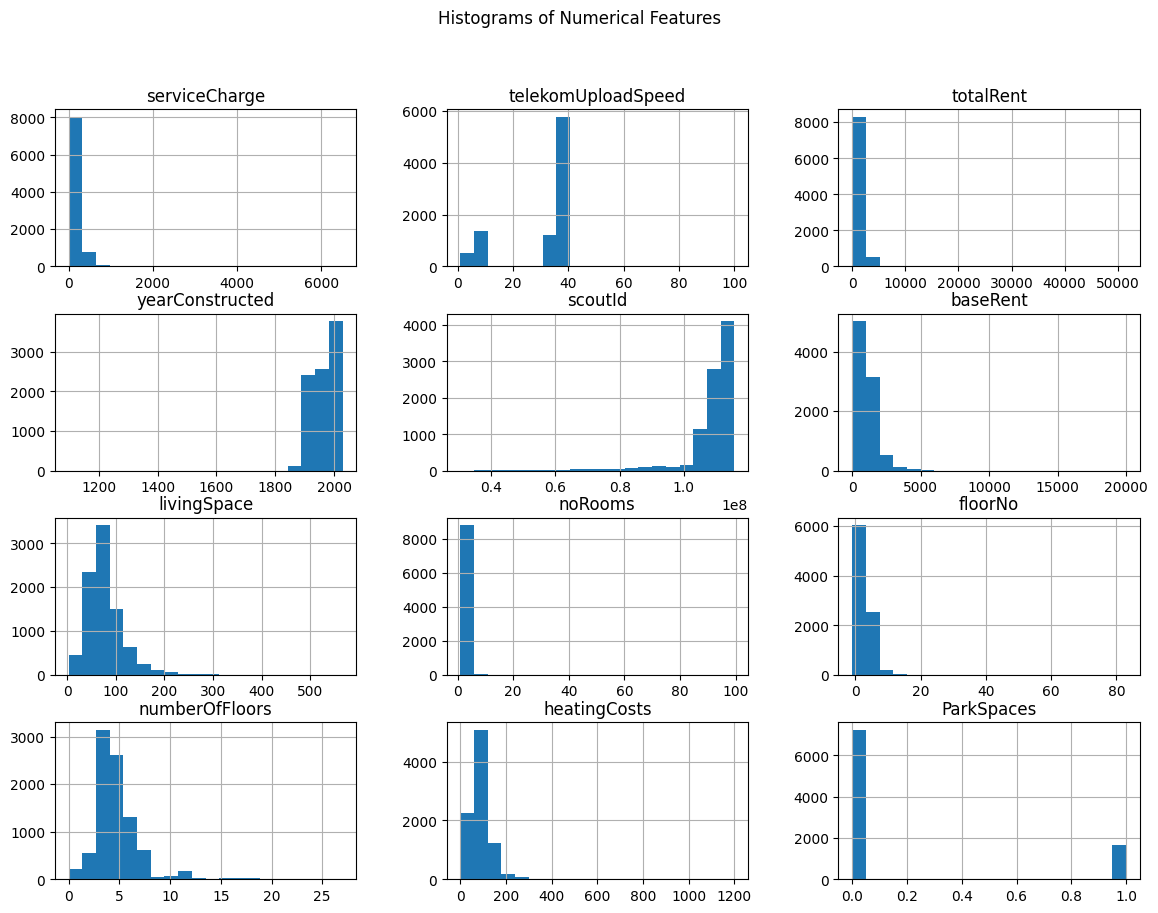

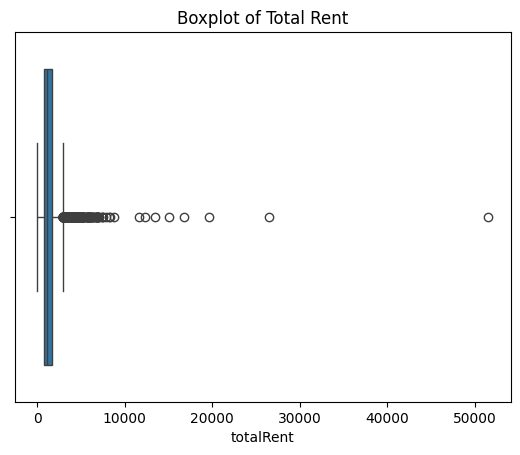

In [70]:
# Plot histograms for numerical features
df_num.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot for detecting outliers in 'totalRent'
sns.boxplot(x=df['totalRent'])
plt.title('Boxplot of Total Rent')
plt.show()